In [42]:
# -*- coding: utf-8 -*-
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imtools

In [43]:
pil_im = Image.open("data/empire.jpg")

PILのshow()

In [44]:
pil_im.show() # デフォルトアプリケーションが設定されていないと，エラー．2回目以降は正常に表示される．

NumPyのimshow()

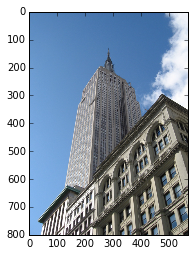

In [45]:
imshow(np.asarray(pil_im))

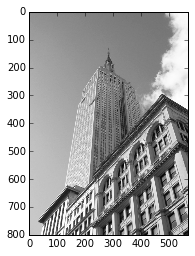

In [46]:
imshow(np.asarray(pil_im.convert('L')), cmap=matplotlib.cm.Greys_r) # Grayscale

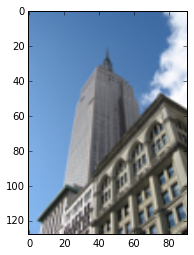

In [30]:
pil_im = Image.open("data/empire.jpg")
pil_im.thumbnail((128,128))
pil_im.show()
imshow(np.asarray(pil_im))

crop, rotate, paste to original image

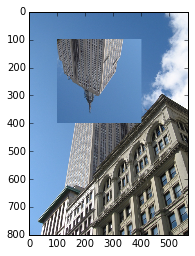

In [31]:
pil_im = Image.open("data/empire.jpg")
box = (100, 100, 400, 400)
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)
imshow(np.asarray(pil_im))

resize, rotate

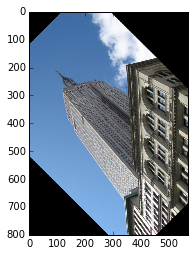

In [33]:
pil_im = Image.open("data/empire.jpg")
out = pil_im.resize((128,128))
out = pil_im.rotate(45)
imshow(np.asarray(out))

## 1.2 Matplotlob

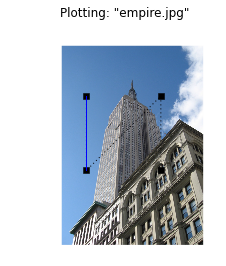

In [35]:
im = array(Image.open("data/empire.jpg"))
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
plot(x, y,'ks:')
plot(x[:2], y[:2])
title('Plotting: "empire.jpg"')
axis('off')
show()

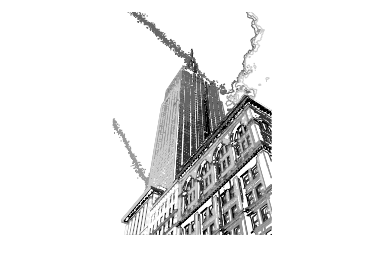

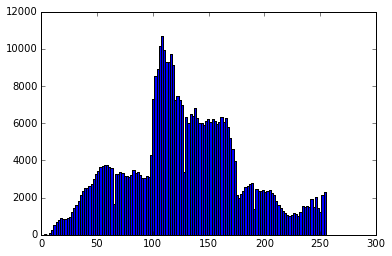

In [36]:
im = array(Image.open("data/empire.jpg").convert('L'))
figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')
show()
figure()
hist(im.flatten(), 128)
show()

In [ ]:
# im = array(Image.open("data/empire.jpg"))
# imshow(im)
# print("Please click 3 points")
# x = ginput(3)
# print("you clicked:", x)
# show()

## Numpy

(800, 569, 3) uint8
(800, 569) float32
3 255
0 252
101 200
0 255


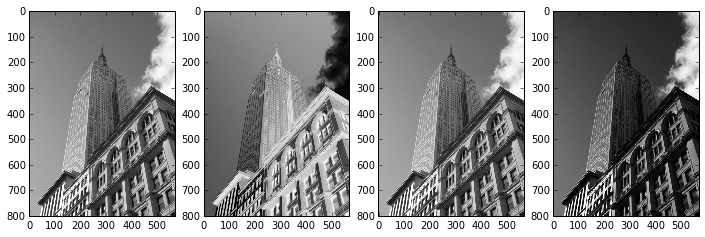

In [54]:
im = array(Image.open("data/empire.jpg"))
print(im.shape, im.dtype)

im = array(Image.open("data/empire.jpg").convert('L'), 'f')
print(im.shape, im.dtype)

im2 = 255 - im
im3 = (100.0/255)*im + 100
im4 = 255.0 * (im/255.0)**2
for i in [im, im2, im3, im4]:
    print(int(i.min()), int(i.max()))

fig, axs = plt.subplots(1,4, figsize=(12, 4))
for i, img in enumerate([im, im2, im3, im4]):
    axs[i].imshow(img)
    

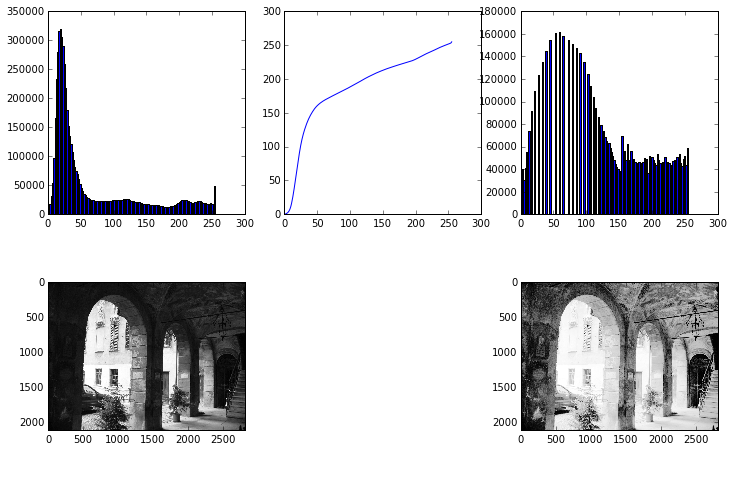

In [63]:
im = array(Image.open("data/AquaTermi_lowcontrast.jpg").convert('L'))
im2, cdf = imtools.histeq(im)
fig, axs = plt.subplots(2,3, figsize=(12, 8))

axs[0, 0].hist(im.flatten(), 128)
axs[1, 0].imshow(im, cmap=matplotlib.cm.Greys_r)
axs[0, 1].plot(cdf)
axs[1, 1].axis('off')
axs[0, 2].hist(im2.flatten(), 128)
axs[1, 2].imshow(im2, cmap=matplotlib.cm.Greys_r)